In [1]:
# Importing necessary libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [12]:
# Visualizations Config
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')

In [2]:
df = pd.read_csv('./dataset/winequality-red.csv')

## CHECKING VARIABLES NAMES

In [4]:
# List all the variables
print('\nLista de todas as variáveis no DataFrame:')
for i, coluna in enumerate(df.columns, 1):
    print(f'{i}. {coluna}')


Lista de todas as variáveis no DataFrame:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality


In [6]:
# Detailed analysis of the variables
var_info = pd.DataFrame({
    'Name': df.columns,
    'D-Type': df.dtypes,
    'N_Uniques': df.nunique(),
    'N_Nulls': df.isnull().sum(),
    '%_Nulls': (df.isnull().sum() / len(df) * 100).round(2),
    'First_Values': [str(df[col].head(3).tolist()) for col in df.columns] 
})

print('\nDetailed information of each variable:')
print(var_info)


Detailed information of each variable:
                                      Name   D-Type  N_Uniques  N_Nulls  \
fixed acidity                fixed acidity  float64         96        0   
volatile acidity          volatile acidity  float64        143        0   
citric acid                    citric acid  float64         80        0   
residual sugar              residual sugar  float64         91        0   
chlorides                        chlorides  float64        153        0   
free sulfur dioxide    free sulfur dioxide  float64         60        0   
total sulfur dioxide  total sulfur dioxide  float64        144        0   
density                            density  float64        436        0   
pH                                      pH  float64         89        0   
sulphates                        sulphates  float64         96        0   
alcohol                            alcohol  float64         65        0   
quality                            quality    int64         

## DATAFRAME BASIC INFORMATIONS 

In [7]:
# Lines and Columns
print("\nDataFrame Dimensions (lines, columns):")
print(df.shape)


DataFrame Dimensions (lines, columns):
(1599, 12)


In [8]:
# Identifing variables types
print("\nData Types:")
print(df.dtypes)


Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [9]:
# DF General Info
print("\nGeneral Info:")
df.info()


General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## DESCRIPTIVE STATISTICS

In [13]:
# Desciptive Statistic
print("\nStatistics for all the columns:")
print(df.describe(include='all'))


Statistics for all the columns:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012

## ANALYSIS OF MISSING VALUES

In [14]:
# Identifing missing values (NANs)
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

for column in df.columns:
    if missing_values[column] > 0:
        print(f"{column}: {missing_values[column]} missing values ({missing_percentages[column]:.2f}%)")

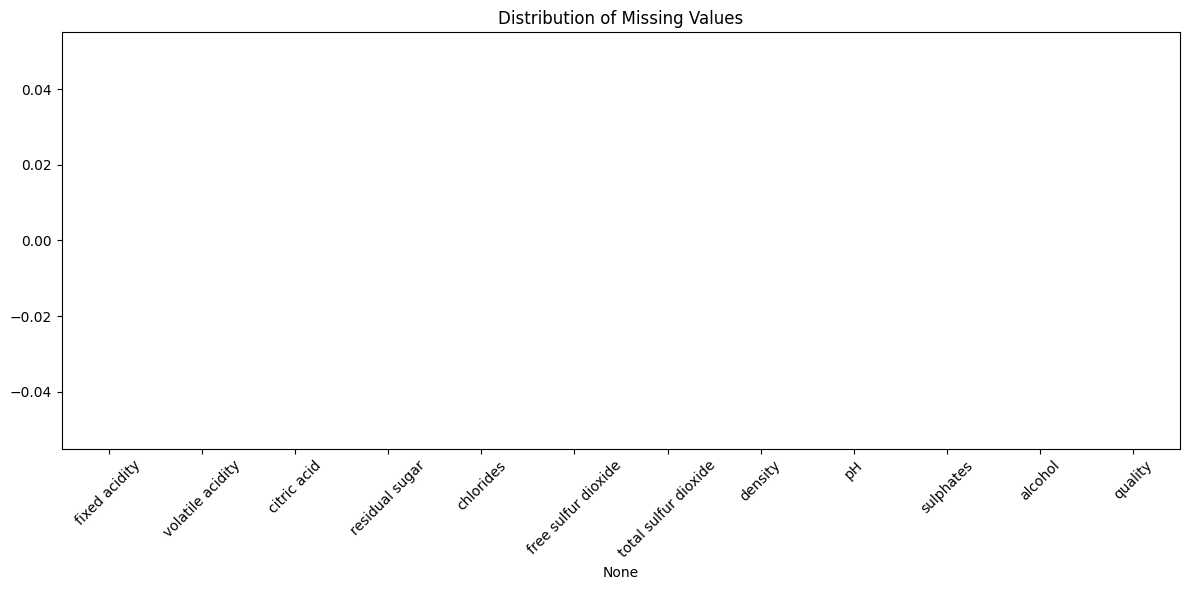

In [15]:
# Missing values Graphic
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.title('Distribution of Missing Values')
plt.tight_layout()
plt.show()

## ANALYSIS OF ZERO VALUES

In [16]:
# Analysis of values equals zero
zeros = (df == 0).sum()
zeros_percentages = (zeros / len(df)) * 100

for column in df.columns:
    if zeros[column] > 0:
        print(f"{column}: {zeros[column]} zeros ({zeros_percentages[column]:.2f}%)")

citric acid: 132 zeros (8.26%)


## ANALYSIS OF UNIQUE VALUES

In [17]:
# Identifing unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

fixed acidity: 96 valores únicos
volatile acidity: 143 valores únicos
citric acid: 80 valores únicos
residual sugar: 91 valores únicos
chlorides: 153 valores únicos
free sulfur dioxide: 60 valores únicos
total sulfur dioxide: 144 valores únicos
density: 436 valores únicos
pH: 89 valores únicos
sulphates: 96 valores únicos
alcohol: 65 valores únicos
quality: 6 valores únicos


## OUTLIERS ANALYSIS


Outliers in fixed acidity:
Total Outliers: 49
Percentual Outliers: 3.06%
Lower Limit: 3.95
Upper Limit: 12.35


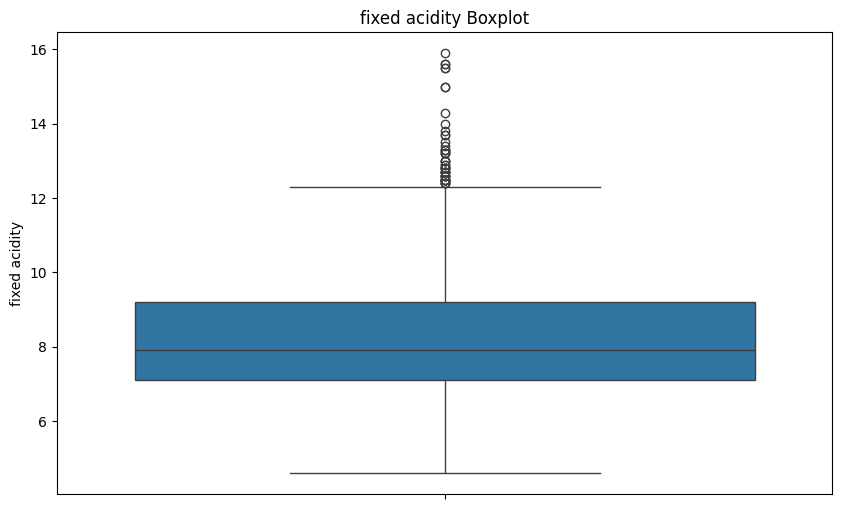


Outliers in volatile acidity:
Total Outliers: 19
Percentual Outliers: 1.19%
Lower Limit: 0.02
Upper Limit: 1.02


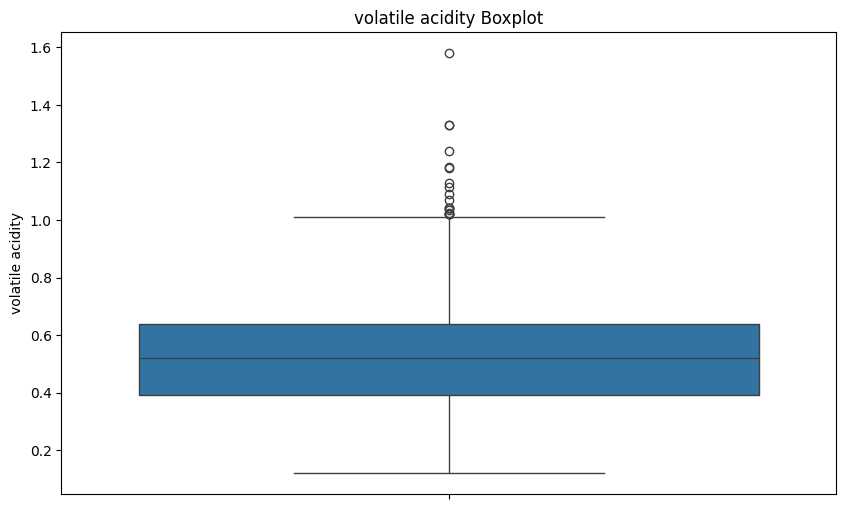


Outliers in citric acid:
Total Outliers: 1
Percentual Outliers: 0.06%
Lower Limit: -0.40
Upper Limit: 0.91


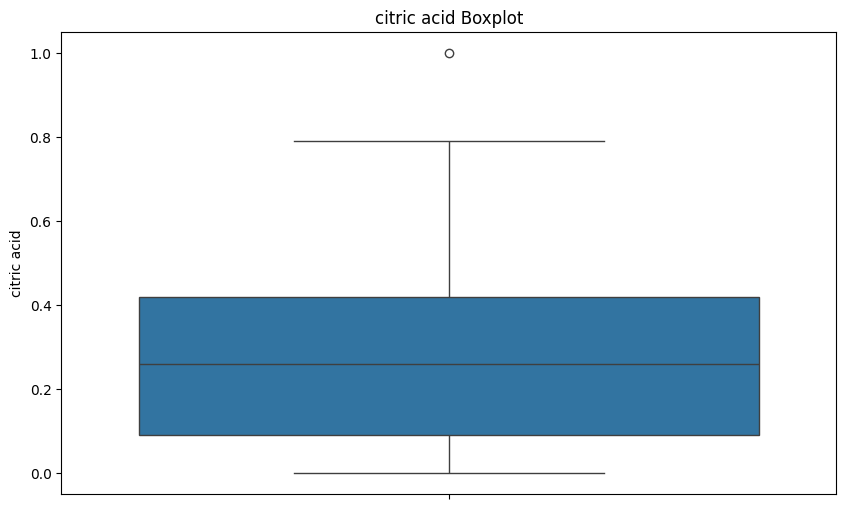


Outliers in residual sugar:
Total Outliers: 155
Percentual Outliers: 9.69%
Lower Limit: 0.85
Upper Limit: 3.65


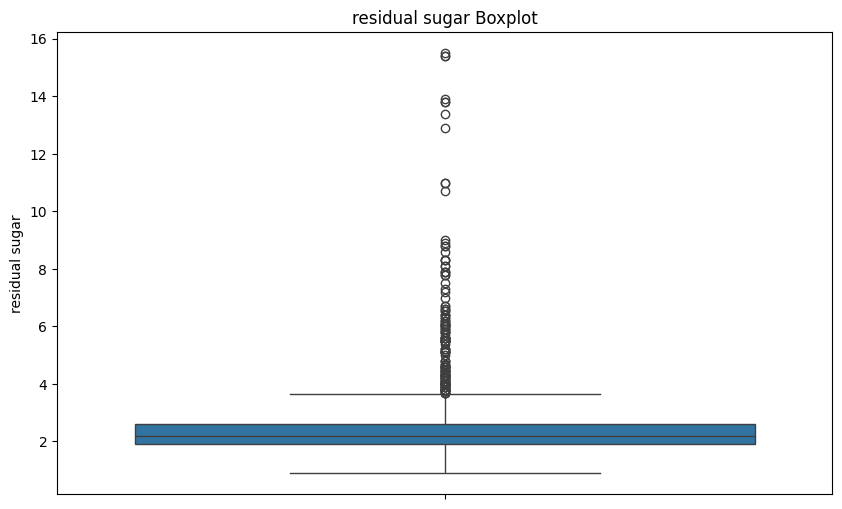


Outliers in chlorides:
Total Outliers: 112
Percentual Outliers: 7.00%
Lower Limit: 0.04
Upper Limit: 0.12


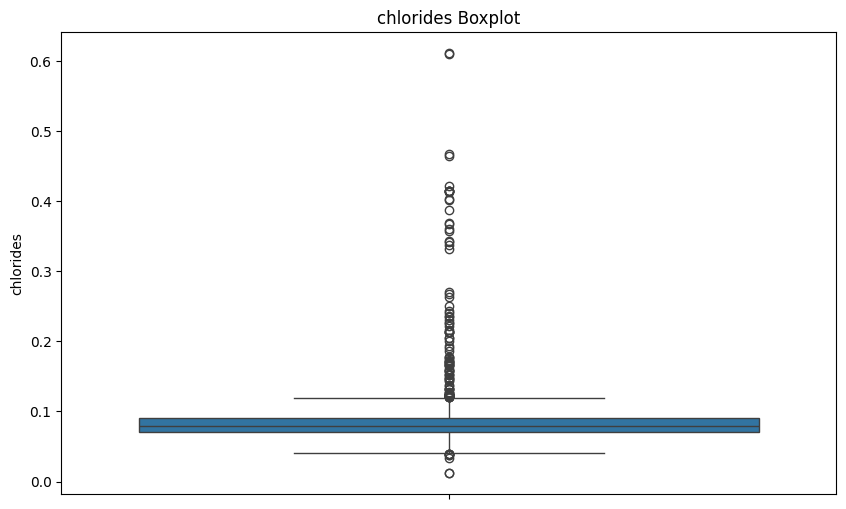


Outliers in free sulfur dioxide:
Total Outliers: 30
Percentual Outliers: 1.88%
Lower Limit: -14.00
Upper Limit: 42.00


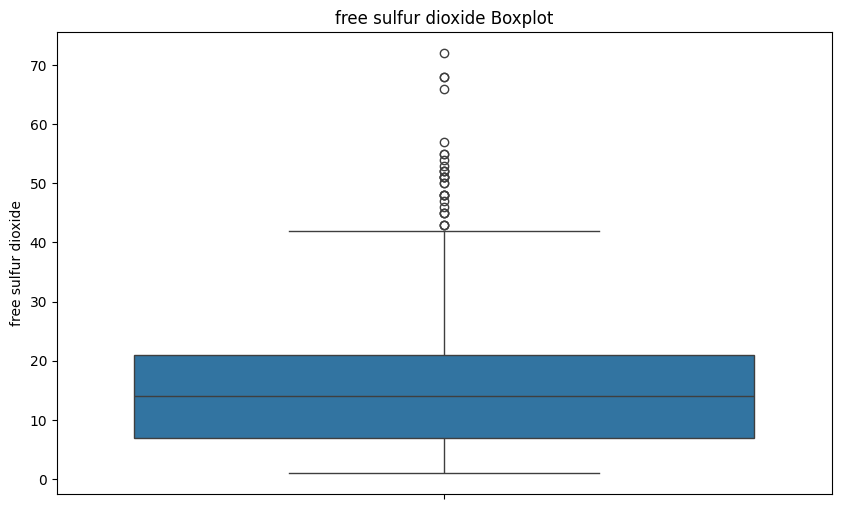


Outliers in total sulfur dioxide:
Total Outliers: 55
Percentual Outliers: 3.44%
Lower Limit: -38.00
Upper Limit: 122.00


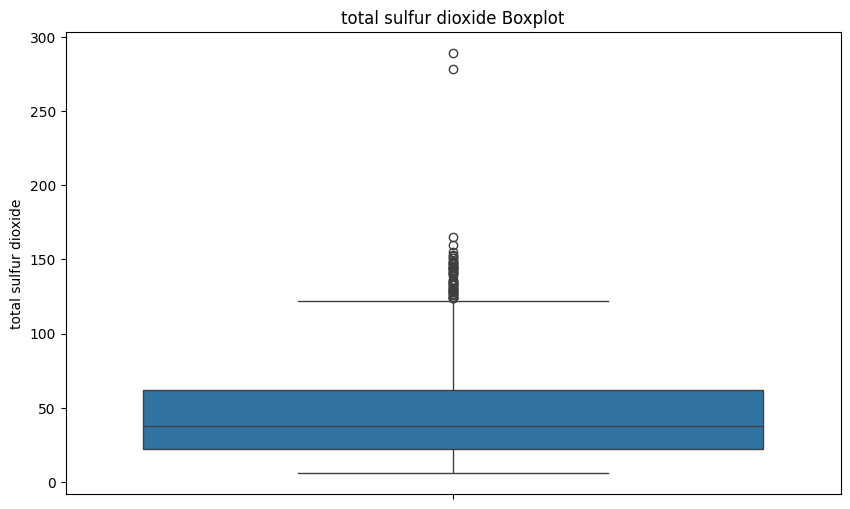


Outliers in density:
Total Outliers: 45
Percentual Outliers: 2.81%
Lower Limit: 0.99
Upper Limit: 1.00


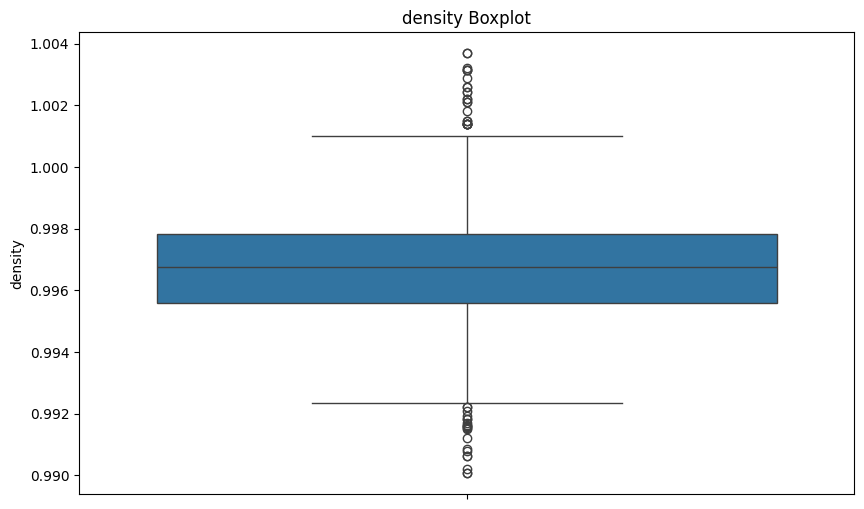


Outliers in pH:
Total Outliers: 35
Percentual Outliers: 2.19%
Lower Limit: 2.92
Upper Limit: 3.68


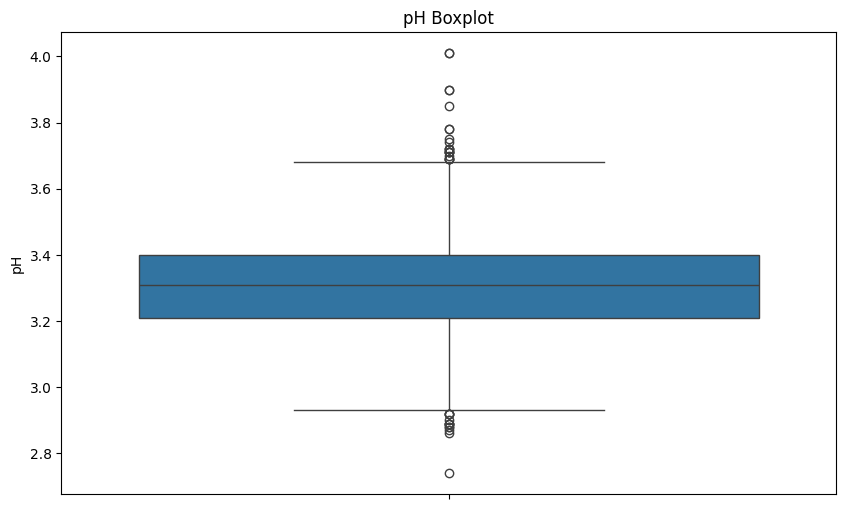


Outliers in sulphates:
Total Outliers: 59
Percentual Outliers: 3.69%
Lower Limit: 0.28
Upper Limit: 1.00


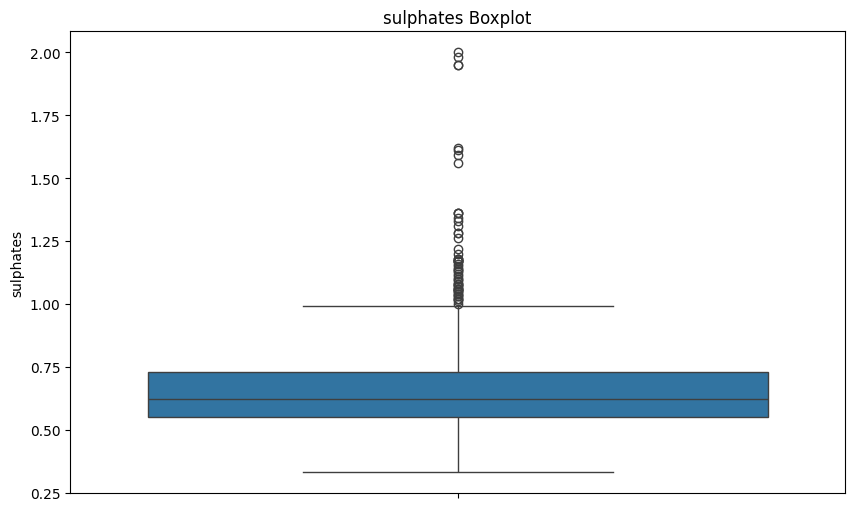


Outliers in alcohol:
Total Outliers: 13
Percentual Outliers: 0.81%
Lower Limit: 7.10
Upper Limit: 13.50


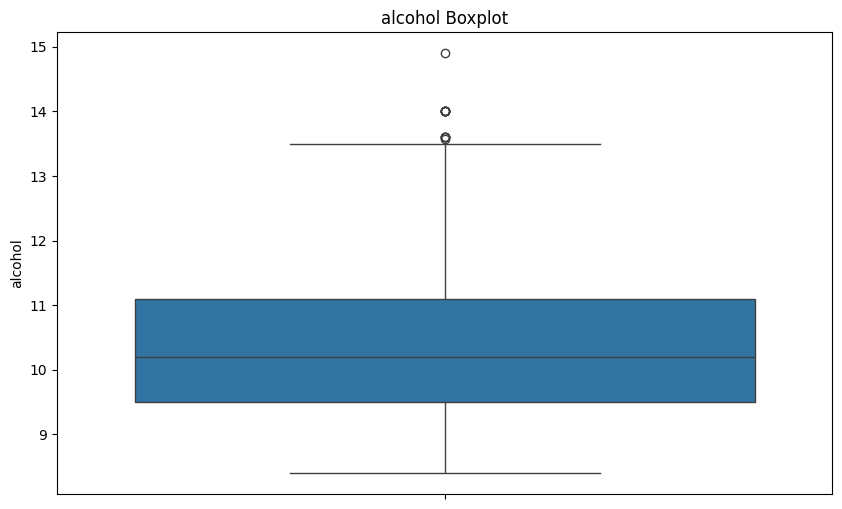


Outliers in quality:
Total Outliers: 28
Percentual Outliers: 1.75%
Lower Limit: 3.50
Upper Limit: 7.50


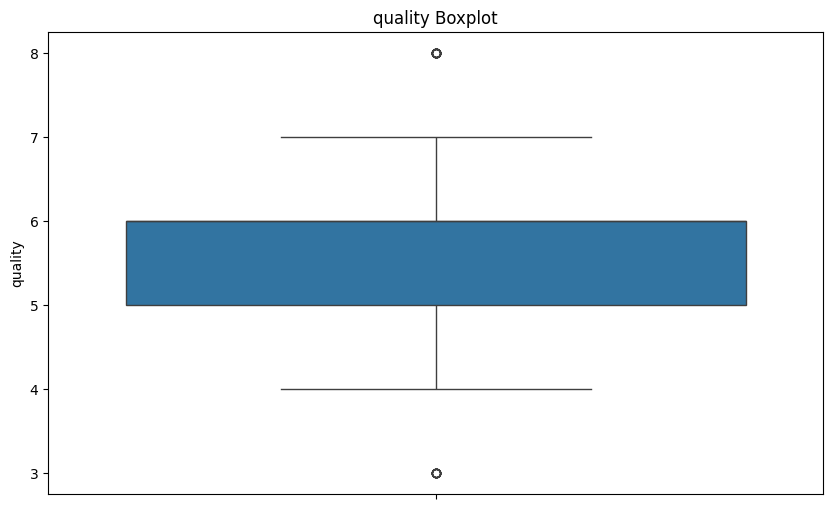

In [25]:
# Initial analysis of outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"\nOutliers in {col}:")
    print(f"Total Outliers: {len(outliers)}")
    print(f"Percentual Outliers: {(len(outliers) / len(df)) * 100:.2f}%")
    print(f"Lower Limit: {lower_bound:.2f}")
    print(f"Upper Limit: {upper_bound:.2f}")

    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()

## CORRELATION ANALYSIS

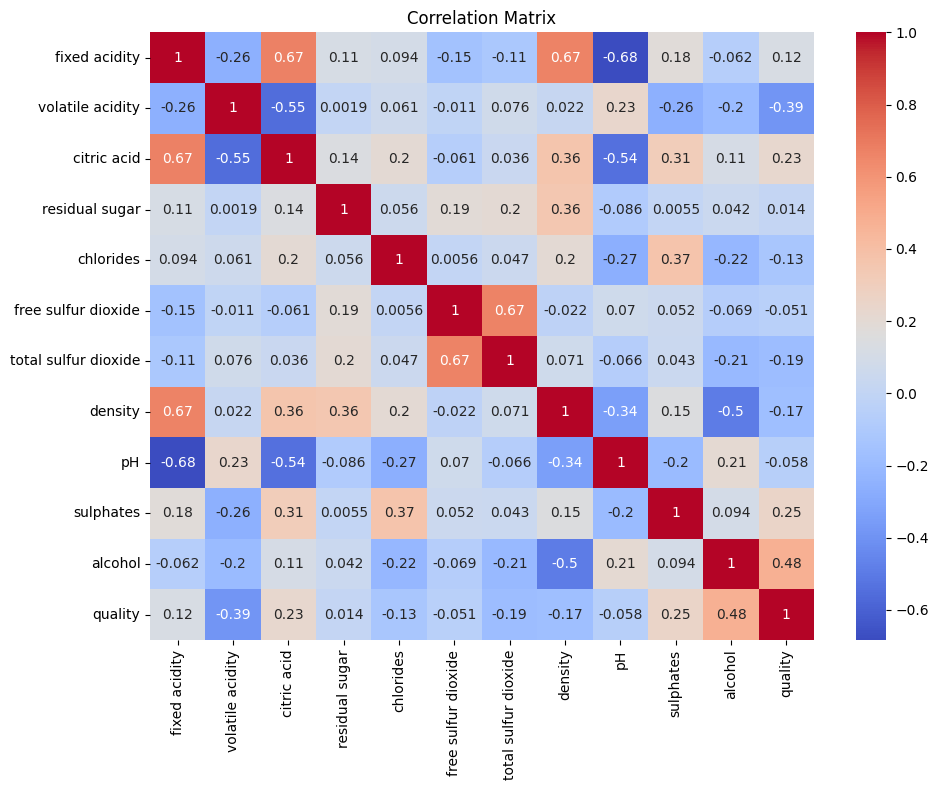

In [24]:
# Basic Correlation Matrix
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

## DISTRIBUTION ANALYSIS

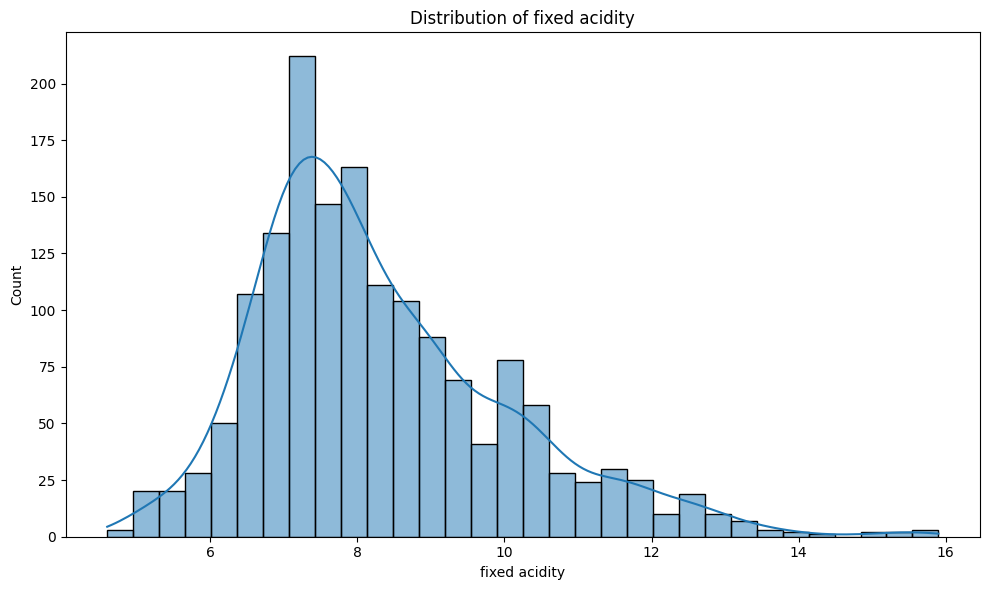

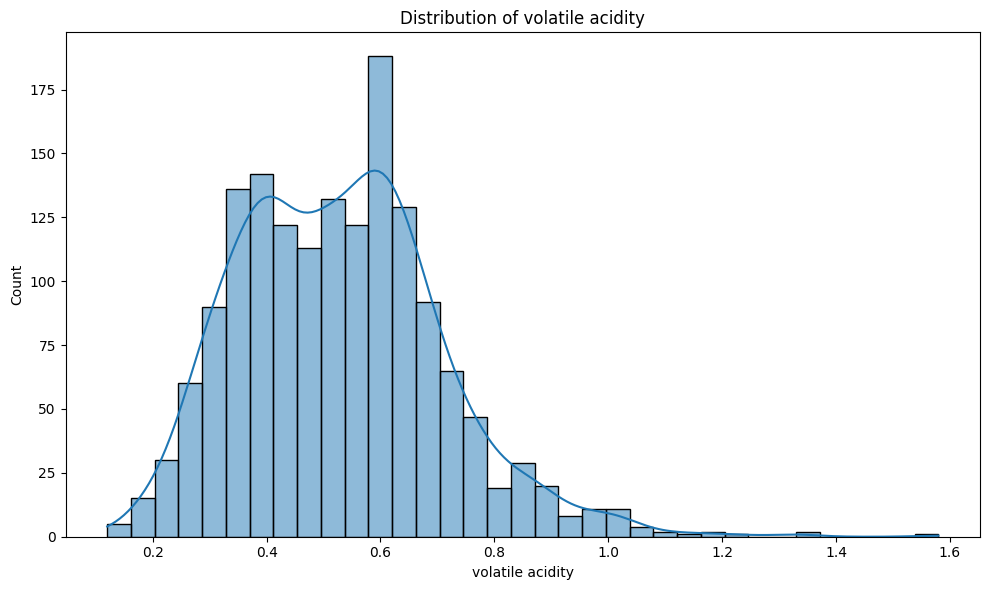

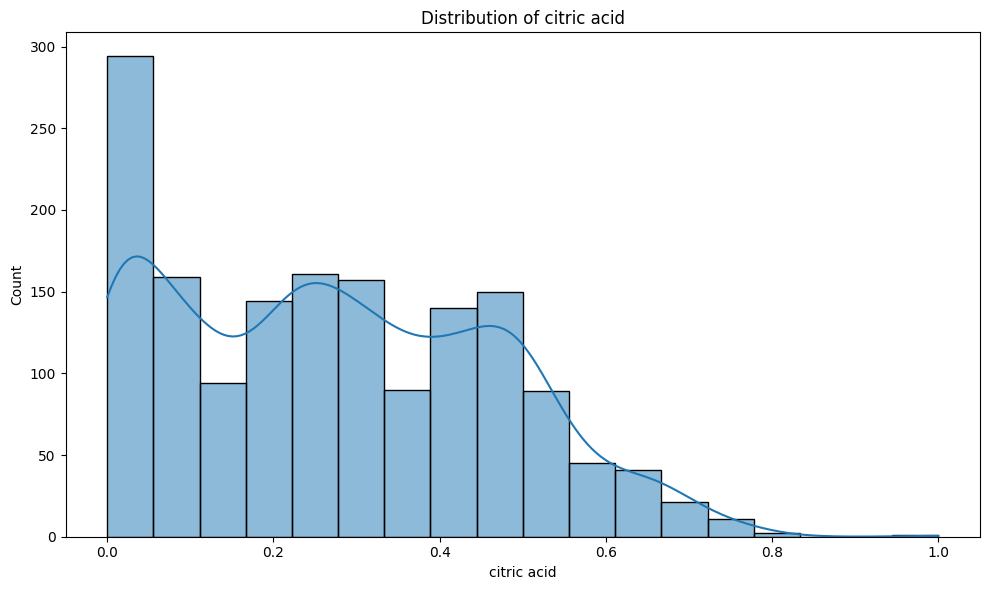

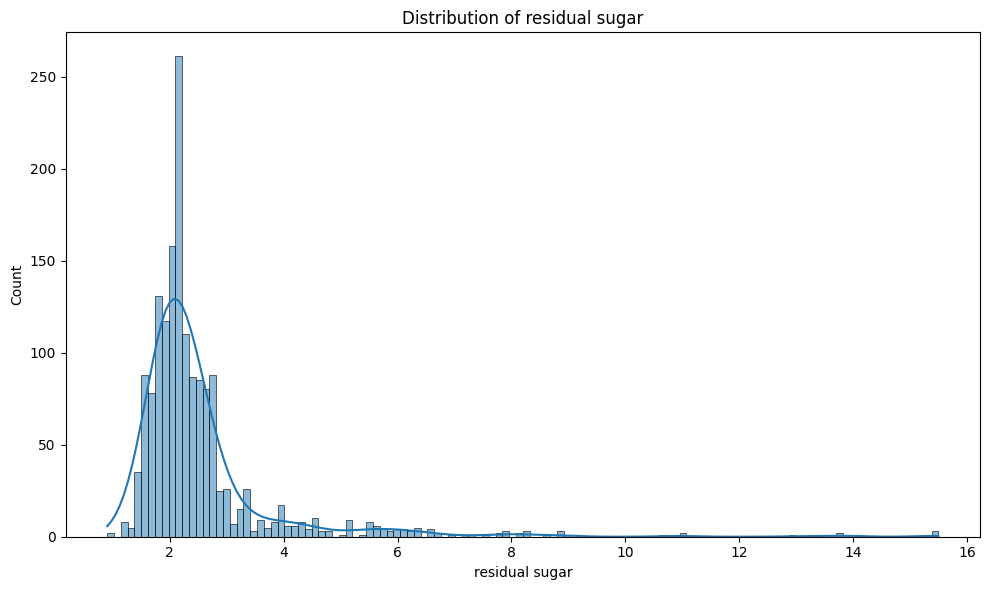

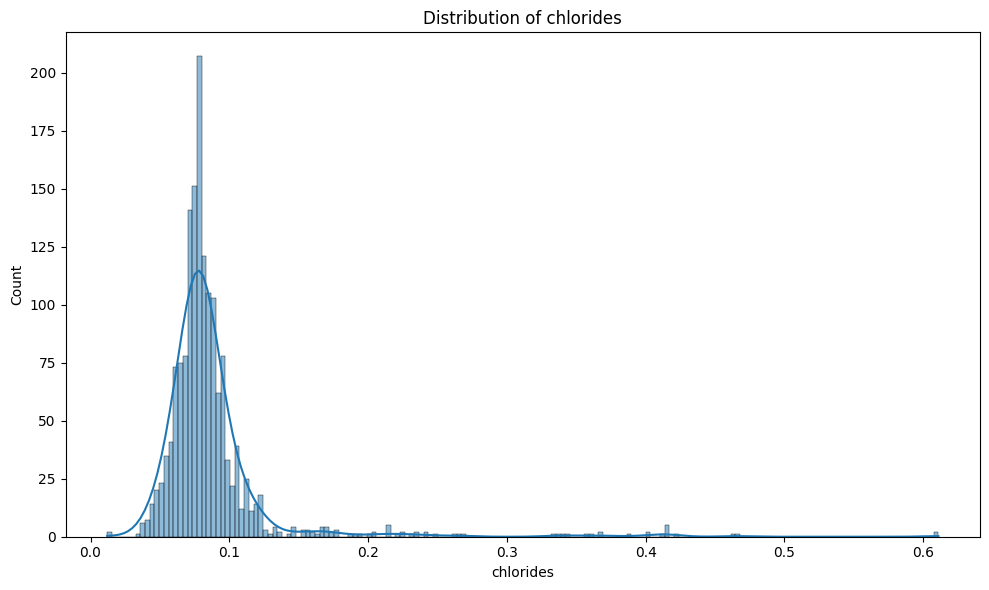

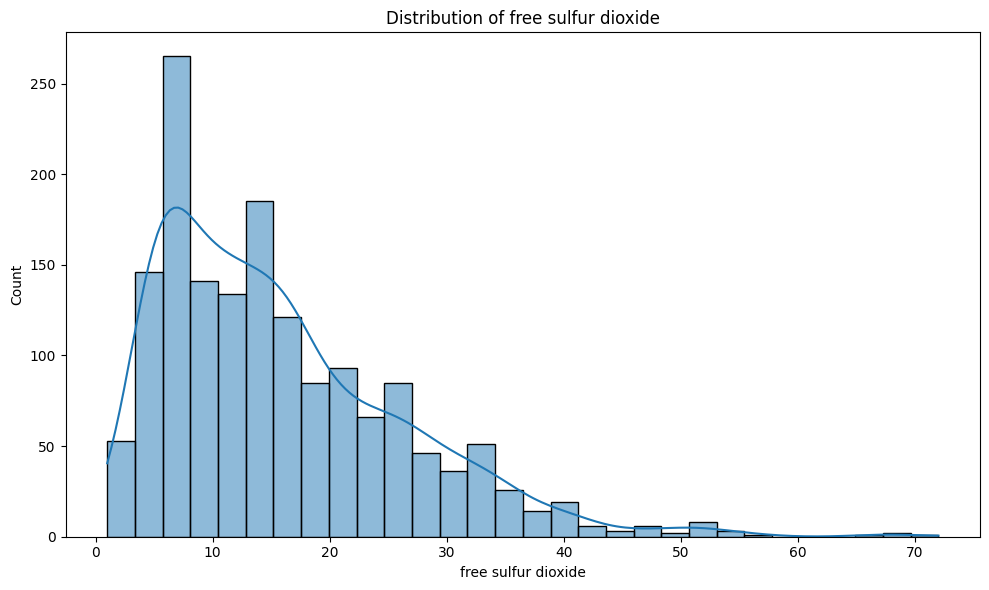

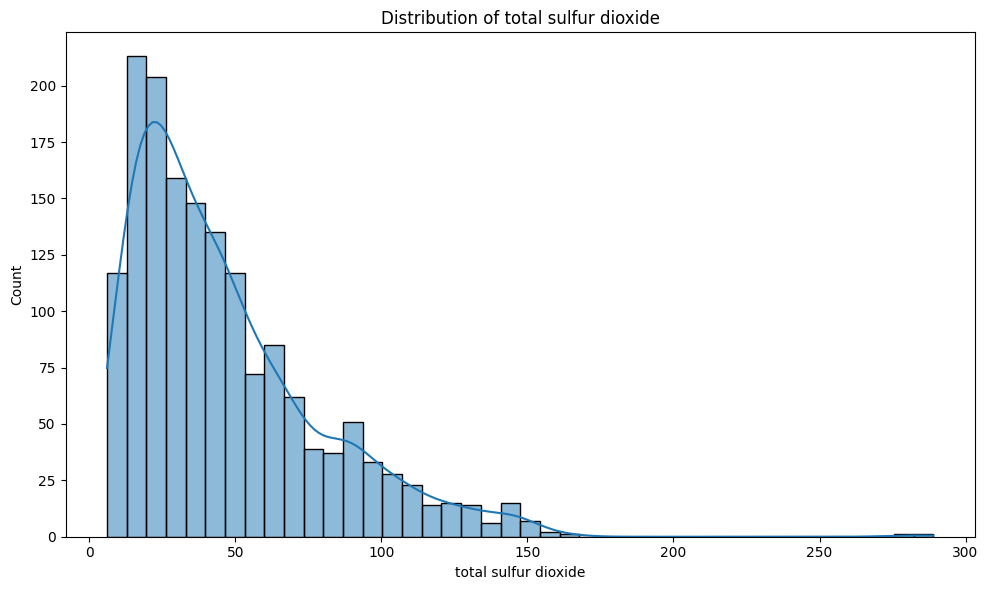

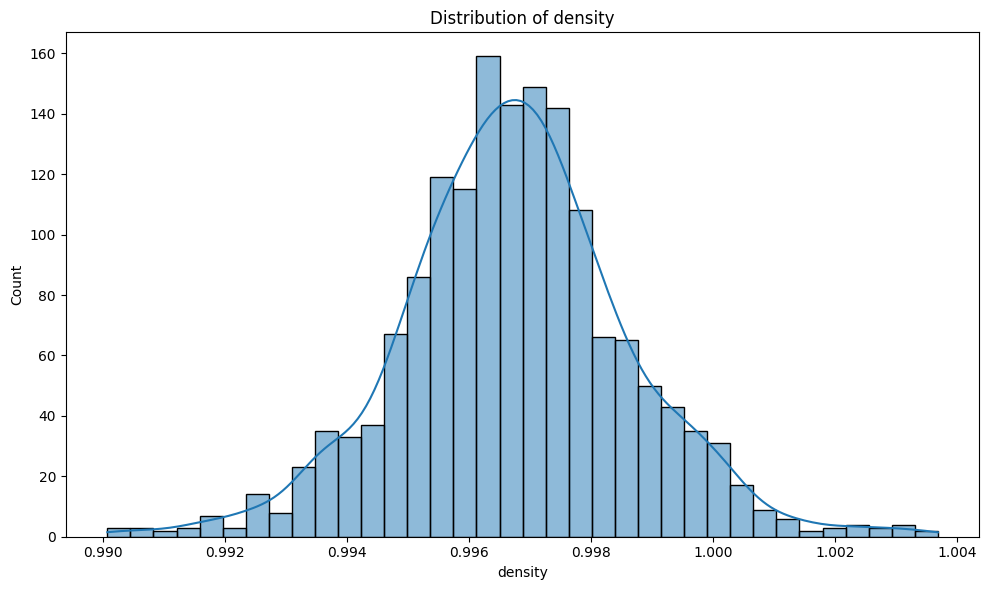

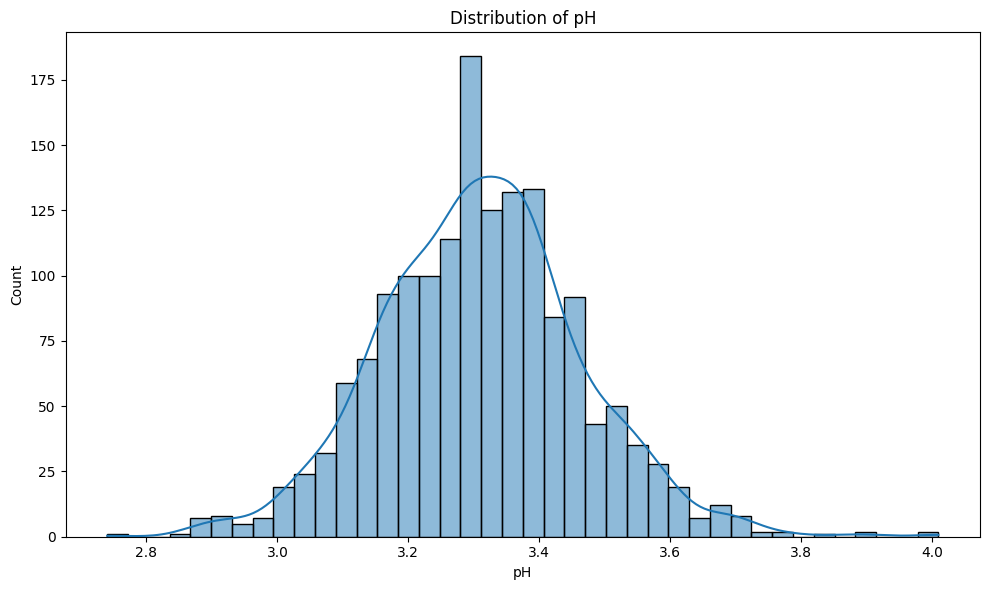

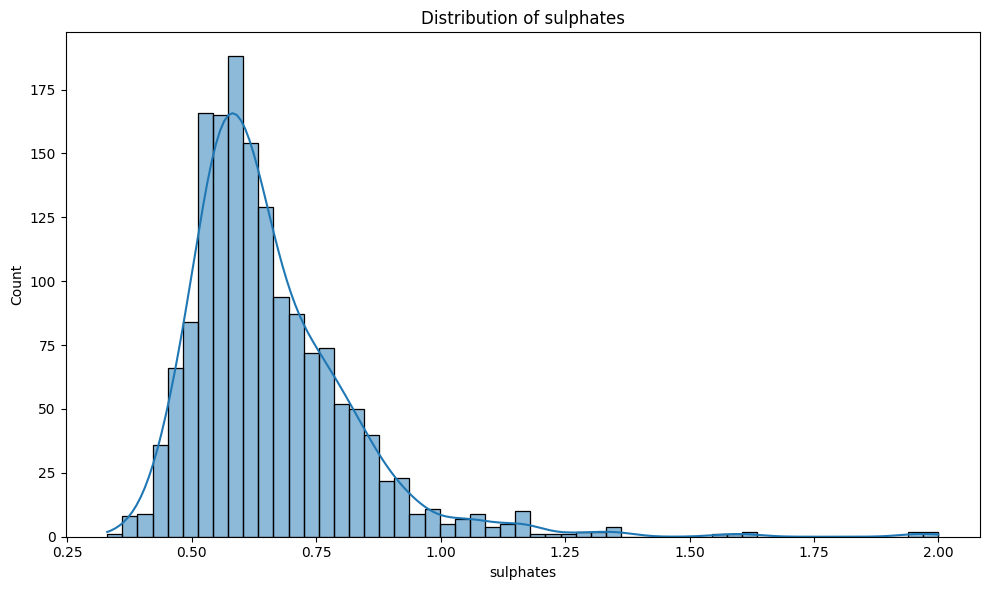

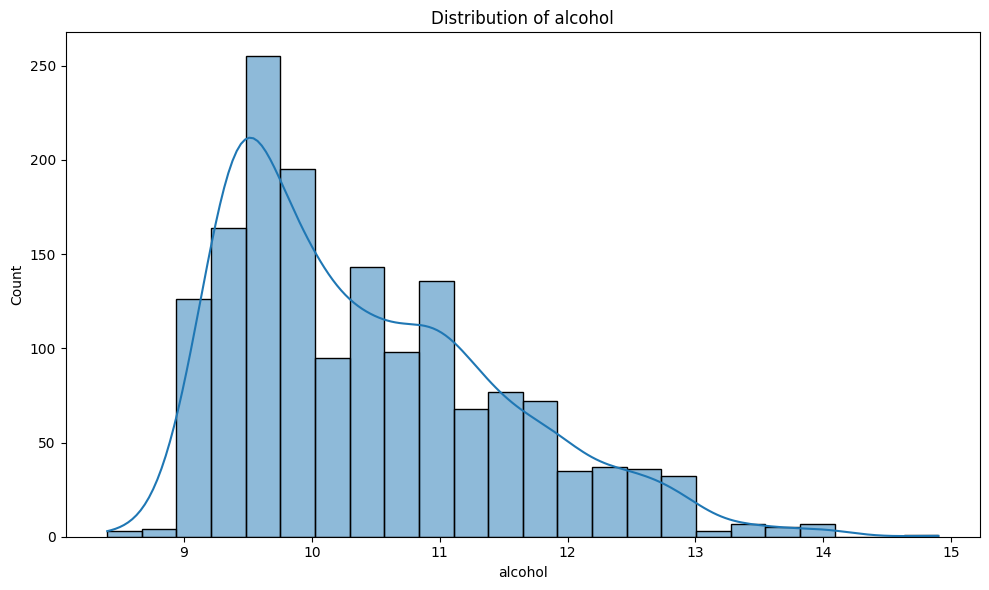

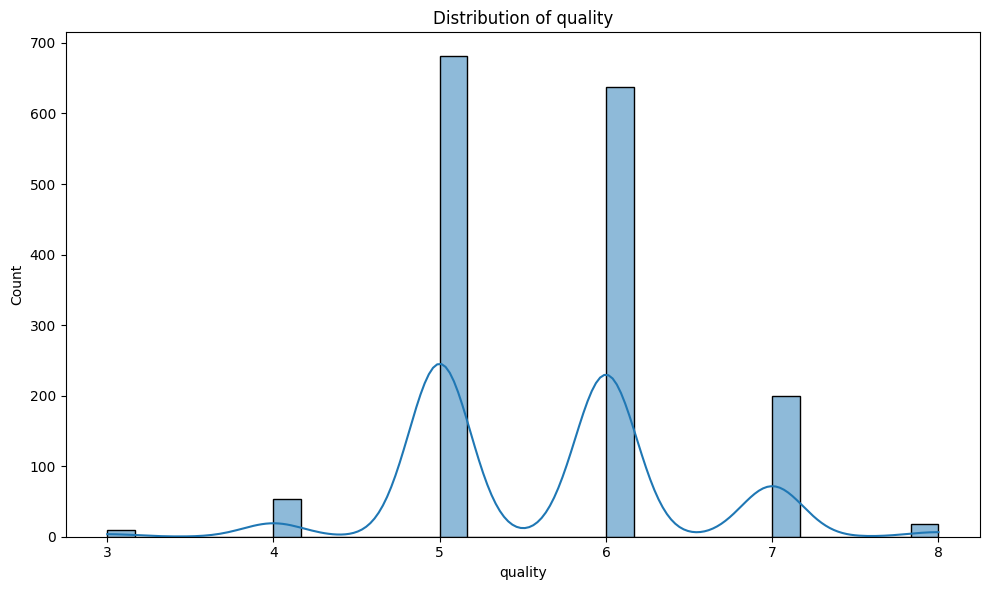

In [22]:
# For Numeric Variables
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [23]:
# For categoric variables
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\Distribution of {col}:")
    print(df[col].value_counts(normalize=True))

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/var/folders/gr/_9p3vf710fs0y5fm06xyt11w0000gn/T/ipykernel_4711/906135631.py:5: SyntaxWarning: invalid escape sequence '\D'
  print(f"\Distribution of {col}:")


## DUPLICATES ANALYSIS

In [30]:
# Identifing duplicate lines
duplicates = df.duplicated().sum()
print(f"Total duplicate lines: {duplicates}")
if duplicates > 0:
    print("\nDuplicate lines:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))

Total duplicate lines: 240

Duplicate lines:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2             0.340         0.00             1.8      0.050   
144             5.2             0.340         0.00             1.8      0.050   
131             5.6             0.500         0.09             2.3      0.049   
132             5.6             0.500         0.09             2.3      0.049   
1488            5.6             0.540         0.04             1.7      0.049   
...             ...               ...          ...             ...        ...   
391            13.7             0.415         0.68             2.9      0.085   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4